## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Task 1: XOR

# Drew Afromsky (daa2162)

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 0)_, ground truth _(g1, g2) = (1, 0), h0 = 0, (wx, wh, b1, w, b2) = (2, 1, 1, 2, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

**Feedforward:**  
$\phi()$ = sigmoid
<br />
$h_1 = \phi(w_xx_1 + w_hh_0 + b_1) = \phi(2*(-1) +1*0 +1) = 0.27$
<br />
$h_2 = \phi(w_xx_2 + w_hh_1 + b_1) = \phi(2*(0) +1*0.27 +1) = 0.57$
<br />
$y_1 = \phi(w_hh_1 + b_2) = \phi(1*(0.27)+1) = 0.57$
<br />
$y_2 = \phi(w_hh_2 + b_2) = \phi(1*(0.57)+1) = 0.64$

**Backpropagation:**  
$$dw = g_1\frac{\partial y_1}{\partial w}+ g_2\frac{\partial y_2}{\partial w} = g_1 \phi_2(h_1)(1-\phi_2(h_1)) h_1+g_2 \phi_2(h_2)(1-\phi_2(h_2)) h_2 = 0.04$$
$$db_2 = g_1\frac{\partial y_1}{\partial b_2}+ g_2\frac{\partial y_2}{\partial b_2} = g_1 \phi_2(h_1)(1-\phi_2(h_1))+g_2 \phi_2(h_2)(1-\phi_2(h_2)) = 0.04$$
$db_1 = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial b_1}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial b_1} = g_1\phi_2(h_1)(1-\phi_2(h_1))w\phi_1(x_1,h_0)(1-\phi_1(x_1,h_0))+g_2 \phi_2(h_2)(1-\phi_2(h_2))w\phi_1(x_2,h_1)(1-\phi_1(x_2,h_1)) = 0.015$  
$dw_x = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_x}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial w_x} = g_1\phi_2(h_1)(1-\phi_2(h_1))w\phi_1(x_1,h_0)(1-\phi_1(x_1,h_0))x_1+g_2 \phi_2(h_2)(1-\phi_2(h_2))w\phi_1(x_2,h_1)(1-\phi_1(x_2,h_1))x_2 = 0.006$  
$dw_h = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_h}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial w_h} = g_1\phi_2(h_1)(1-\phi_2(h_1))w\phi_1(x_1,h_0)(1-\phi_1(x_1,h_0))h_0+g_2 \phi_2(h_2)(1-\phi_2(h_2))w\phi_1(x_2,h_1)(1-\phi_1(x_2,h_1))h_1 = 0.006$  


In [2]:
# use tensorflow to verify the answer.
w = tf.Variable(2.0)
b2 = tf.Variable(1.0)
wx = tf.Variable(2.0)
wh = tf.Variable(1.0)
b1 = tf.Variable(1.0)

h0 = tf.Variable(0.0)
x = tf.placeholder(tf.float32, shape=(2,))
g = tf.placeholder(tf.float32, shape=(2,))

y = []
h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
y.append(tf.sigmoid(w*h1 + b2))
h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
y.append(tf.sigmoid(w*h2 + b2))

loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

dw, db2, dwx, dwh, db1 = tf.gradients(loss, [w, b2, wx, wh, b1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dw_t, db2_t, dwx_t, dwh_t, db1_t = sess.run([dw, db2, dwx, dwh, db1],
                                              feed_dict={x: np.asarray([-1.0,0.0]), g: np.asarray([1.0,0.0])})
print("verify by tensorflow")
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))

Instructions for updating:
Colocations handled automatically by placer.
verify by tensorflow
dw = 0.0413, db2 = 0.0360, dwx = 0.0060, dwh = 0.0057, db1 = 0.0152


## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [3]:
from utils.xor.dataset import create_dataset

### (Demo) Build a network using a Tensorlow LSTMCell and GRUCell
This section shows an example how to build a RNN network using an LSTM cell or GRU cell. Both LSTM and GRU cell are inbuilt classes in tensorflow which separately implement the real behavior of the LSTM and GRU neuron. 

Reference: 
1. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/LSTMCell)
1. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

#### LSTM

In [4]:
from tensorflow.contrib.rnn import LSTMCell

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use keras.layers.dense instead.


#### GRU

In [5]:
from tensorflow.contrib.rnn import GRUCell

# define GRU cell
gru_units = 64
cell = GRUCell(gru_units)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


### Training 

<span style='color:red'>TODO:</span> 
1. Build your training function for RNN (choose either LSTM or GRU); 
2. Plot the cost during the training

In [8]:
# TODO: training
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
loss_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(200):        
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_list.append(cost)
        print('epoch {}: cost = {}'.format(e+1, cost))

epoch 1: cost = 1.6051230430603027
epoch 2: cost = 0.7229105234146118
epoch 3: cost = 0.9231352806091309
epoch 4: cost = 0.7375129461288452
epoch 5: cost = 0.7777095437049866
epoch 6: cost = 0.7371135950088501
epoch 7: cost = 0.7223213911056519
epoch 8: cost = 0.7074686288833618
epoch 9: cost = 0.6981643438339233
epoch 10: cost = 0.7058442234992981
epoch 11: cost = 0.6972298622131348
epoch 12: cost = 0.692955732345581
epoch 13: cost = 0.6876848340034485
epoch 14: cost = 0.6824179291725159
epoch 15: cost = 0.6812304854393005
epoch 16: cost = 0.6797322630882263
epoch 17: cost = 0.6772022843360901
epoch 18: cost = 0.6750009655952454
epoch 19: cost = 0.6719738841056824
epoch 20: cost = 0.6680291295051575
epoch 21: cost = 0.6644564270973206
epoch 22: cost = 0.6602720618247986
epoch 23: cost = 0.6559365391731262
epoch 24: cost = 0.6517509818077087
epoch 25: cost = 0.6463326215744019
epoch 26: cost = 0.6406421661376953
epoch 27: cost = 0.633391797542572
epoch 28: cost = 0.6245543956756592
epo

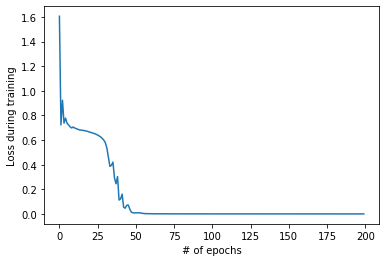

In [9]:
# TODO: plot loss history
plt.plot(loss_list)
plt.ylabel('Loss during training')
plt.xlabel('# of epochs')
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in utils/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [10]:
from utils.xor.rnn import MyLSTMCell

In [11]:
# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [12]:
# TODO: training
seq = 8
num = 80000
x_train, y_train = create_dataset(num, seq)
loss_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(200):        
        sess.run(optimizer, feed_dict={input_data: x_train, output_data: y_train})
        cost = sess.run(loss, feed_dict={input_data: x_train, output_data: y_train})
        loss_list.append(cost)
        print('epoch {}: cost = {}'.format(e+1, cost))

epoch 1: cost = 1.0542060136795044
epoch 2: cost = 0.6918038129806519
epoch 3: cost = 0.7185684442520142
epoch 4: cost = 0.7028022408485413
epoch 5: cost = 0.6955546140670776
epoch 6: cost = 0.7020184397697449
epoch 7: cost = 0.6936736702919006
epoch 8: cost = 0.6892220377922058
epoch 9: cost = 0.6910116672515869
epoch 10: cost = 0.6920033097267151
epoch 11: cost = 0.6905628442764282
epoch 12: cost = 0.6906330585479736
epoch 13: cost = 0.6911150217056274
epoch 14: cost = 0.6896094679832458
epoch 15: cost = 0.6863728165626526
epoch 16: cost = 0.6848773956298828
epoch 17: cost = 0.6841759085655212
epoch 18: cost = 0.6833594441413879
epoch 19: cost = 0.6819818615913391
epoch 20: cost = 0.6800290942192078
epoch 21: cost = 0.6777909398078918
epoch 22: cost = 0.6752917766571045
epoch 23: cost = 0.6722683310508728
epoch 24: cost = 0.66817307472229
epoch 25: cost = 0.662865161895752
epoch 26: cost = 0.6561031341552734
epoch 27: cost = 0.6546146869659424
epoch 28: cost = 0.6485452055931091
epoc

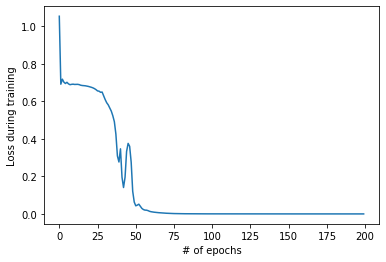

In [13]:
# TODO: plot loss history
plt.plot(loss_list)
plt.ylabel('Loss during training')
plt.xlabel('# of epochs')
plt.show()